In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [129]:
x0 = 10.0
n = 8
dx = 2*x0/n
x = np.linspace(-x0, x0, n)
alpha = 0.1
beta = 0.1
m = 1.0

def oe_kinetic(i, j) :
    if (i==j): 
        t_ij =  (-1)**(i-i) * (1.0 / (2.0 * m * dx**2)) * np.pi**2 / 3.0
    else:
        t_ij = (-1)**(i-j) * (1.0 / (2.0 * m * dx**2)) * 2.0 / (i-j)**2
    return(t_ij)

def oe_sc_single_well(i, j) :
    if (i==j):
        v_ij = -2.0/np.sqrt(x[i-1]**2 + alpha)
    else: 
        v_ij = 0.0
    return(v_ij)

def te_kinetic(u, v) :
    i = int((u-1)/n)+1
    j = int((v-1)/n)+1
    k = ((u-1)%n)+1
    l = ((v-1)%n)+1
    t_uv = 0.0
    if (k==l):
        t_uv += oe_kinetic(i,j) 
    if (i==j):
         t_uv += oe_kinetic(k,l)
    return(t_uv)

def te_sc_single_well(u, v) :
    if (u == v):
        i = int((u-1)/n)+1
        j = ((u-1)%n)+1
        v_uv = oe_sc_single_well(i, i) + oe_sc_single_well(j, j)
        v_uv = v_uv + ((1.0)/np.sqrt(beta + (x[i-1]-x[j-1])**2))
    else:
        v_uv = 0.0
    return(v_uv)


In [130]:
h = np.zeros((n**2,n**2))
t = np.zeros((n**2,n**2))
v = np.zeros((n**2,n**2))

for i in range(n**2):
    t[i,i] = te_kinetic(i+1,i+1)
    v[i,i] = te_sc_single_well(i+1,i+1)
    for j in range(i+1,n**2):
        t[i,j] = te_kinetic(i+1,j+1)
        t[j,i] = t[i,j]
        v[i,j] = te_sc_single_well(i+1,j+1)
        v[j,i] = v[i,j]
h = t + v

In [131]:
vals, vecs = np.linalg.eigh(h)
vals[0]


-1.9566005722629964

Text(0, 0.5, 'x2')

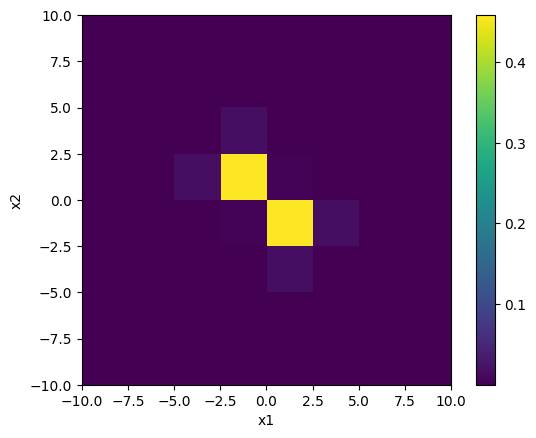

In [132]:
density = vecs[:,0].reshape(n,n)**2
density = density[::-1,:] # rearranging the order so that negative quadrants are below
plt.imshow(density, extent=(-10,10,-10,10))
plt.colorbar()
plt.xlabel("x1")
plt.ylabel("x2")
# plt.xlim(-5,5)
# plt.ylim(-5,5)

In [133]:
T1 = np.zeros((n,n))
for i in range(n):
    T1[i,i] = oe_kinetic(i+1,i+1)
    for j in range(i+1,n):
        T1[i,j] = oe_kinetic(i+1,j+1)
        T1[j,i] = T1[i,j]
V1 = np.diag([-2/np.sqrt(alpha + xi**2) for xi in x])

In [134]:
H1 = T1 + V1
H0 = np.kron(H1,np.eye(n)) + np.kron(np.eye(n),H1)
Vee = np.diag([1/np.sqrt(beta+(xi-xj)**2) for xi in x for xj in x])

In [135]:
H = H0 + Vee

In [136]:
vals, vecs = np.linalg.eigh(H)
vals[0]

-1.9566005722629933

Text(0, 0.5, 'x2')

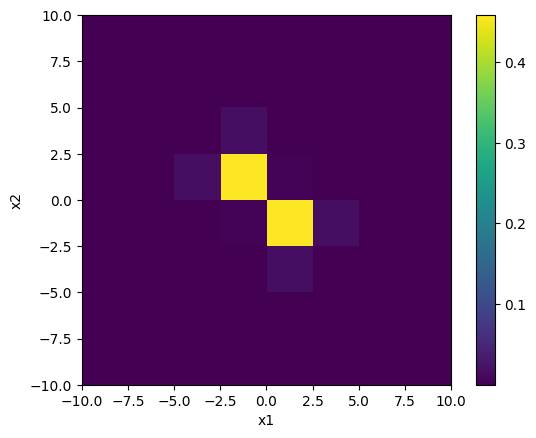

In [137]:
density = vecs[:,0].reshape(n,n)**2
density = density[::-1,:] # rearranging the order so that negative quadrants are below
plt.imshow(density, extent=(-10,10,-10,10))
plt.colorbar()
plt.xlabel("x1")
plt.ylabel("x2")
# plt.xlim(-5,5)
# plt.ylim(-5,5)

In [138]:
T = np.kron(T1,np.eye(n)) + np.kron(np.eye(n),T1)

In [139]:
np.allclose(T,t)

True

In [140]:
np.round(T[:8,:8],2)

array([[ 0.53, -0.16,  0.04, -0.02,  0.01, -0.01,  0.  , -0.  ],
       [-0.16,  0.53, -0.16,  0.04, -0.02,  0.01, -0.01,  0.  ],
       [ 0.04, -0.16,  0.53, -0.16,  0.04, -0.02,  0.01, -0.01],
       [-0.02,  0.04, -0.16,  0.53, -0.16,  0.04, -0.02,  0.01],
       [ 0.01, -0.02,  0.04, -0.16,  0.53, -0.16,  0.04, -0.02],
       [-0.01,  0.01, -0.02,  0.04, -0.16,  0.53, -0.16,  0.04],
       [ 0.  , -0.01,  0.01, -0.02,  0.04, -0.16,  0.53, -0.16],
       [-0.  ,  0.  , -0.01,  0.01, -0.02,  0.04, -0.16,  0.53]])

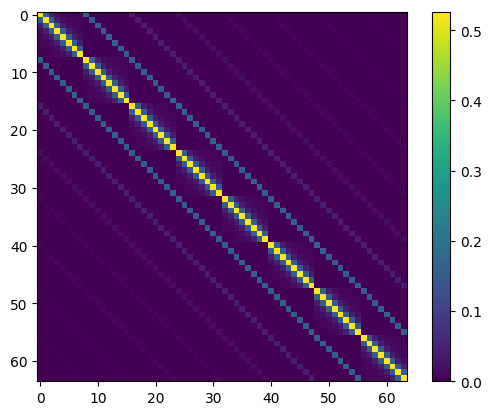

In [147]:
plt.imshow(abs(T))
plt.colorbar()